# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
from api_keys import weather_api_key

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "castro"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

## Generate Cities List

In [3]:
# Generate random list
lat=np.random.uniform(low=-90, high=90, size=1500)
lat

array([  6.63241077,  28.2100515 ,   5.37479732, ..., -47.62638315,
         5.2912623 , -66.52152465])

In [4]:
lon=np.random.uniform(low=-180, high=180, size=1500)
lon

array([  10.50118888,   49.4364933 , -136.50992961, ...,  -13.42370476,
          1.10409746, -152.79088735])

In [5]:
cities = []
positions= list(zip(lat,lon))
#positions

for position in positions:
   
    city = citipy.nearest_city(position[0], position[1]).city_name
    if city not in cities:
        cities.append(city)

In [6]:
#print(cities)

In [7]:
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [9]:
weather_api_key

'ef947681f26f8df1851951dae43c66d8'

In [10]:
# Build query URL
query1_url = f"{url}appid={weather_api_key}&units={units}&q="
query1_url

'http://api.openweathermap.org/data/2.5/weather?appid=ef947681f26f8df1851951dae43c66d8&units=metric&q='

In [11]:
# Define Variables

city_name_list = []
city_id_list = []
cloudiness_list = []
date_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lon_list = []
date_temp_list = []
max_temp_list = []
wind_speed_list = []

index_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#query_url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        
        
        city_name_list.append(response["name"])
        city_id_list.append(response["id"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        date_temp_list.append(response['main']['temp'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} : {city}")
        
    except(KeyError, IndexError):
            
        print("City not found. Skipping .....")
            
        pass
            
        
        

City not found. Skipping .....
Processing Record 1 : bushehr
Processing Record 2 : atuona
Processing Record 3 : dongsheng
Processing Record 4 : ponta do sol
Processing Record 5 : lasa
Processing Record 6 : pangody
Processing Record 7 : broken hill
Processing Record 8 : busselton
Processing Record 9 : paradise valley
Processing Record 10 : port alfred
Processing Record 11 : abu samrah
Processing Record 12 : rikitea
Processing Record 13 : tasiilaq
Processing Record 14 : ancud
Processing Record 15 : bredasdorp
Processing Record 16 : qaanaaq
Processing Record 17 : port-cartier
Processing Record 18 : dingle
Processing Record 19 : bengkulu
Processing Record 20 : sioux lookout
Processing Record 21 : clyde river
Processing Record 22 : codrington
Processing Record 23 : mataura
City not found. Skipping .....
City not found. Skipping .....
Processing Record 24 : jamestown
Processing Record 25 : katsuura
Processing Record 26 : east london
Processing Record 27 : kapaa
Processing Record 28 : airai
P

Processing Record 231 : yellowknife
Processing Record 232 : camacha
Processing Record 233 : ternate
Processing Record 234 : nadym
Processing Record 235 : kaminoyama
Processing Record 236 : conde
Processing Record 237 : karaton
Processing Record 238 : puerto escondido
Processing Record 239 : stokmarknes
Processing Record 240 : pahrump
Processing Record 241 : hamilton
City not found. Skipping .....
Processing Record 242 : manglisi
Processing Record 243 : deputatskiy
Processing Record 244 : atherton
Processing Record 245 : port keats
Processing Record 246 : taoudenni
Processing Record 247 : wad rawah
Processing Record 248 : koslan
Processing Record 249 : tautira
Processing Record 250 : vredendal
Processing Record 251 : mandera
City not found. Skipping .....
City not found. Skipping .....
Processing Record 252 : sisophon
Processing Record 253 : sopelana
City not found. Skipping .....
Processing Record 254 : komsomolskiy
Processing Record 255 : naze
Processing Record 256 : tuensang
Processi

Processing Record 457 : verkhoyansk
Processing Record 458 : kawalu
Processing Record 459 : moron
Processing Record 460 : antalaha
Processing Record 461 : sernovodsk
Processing Record 462 : keetmanshoop
Processing Record 463 : boyolangu
Processing Record 464 : burnie
Processing Record 465 : henties bay
Processing Record 466 : nurota
Processing Record 467 : puerto palomas
Processing Record 468 : voznesenskaya
Processing Record 469 : najran
Processing Record 470 : fukue
Processing Record 471 : havre-saint-pierre
Processing Record 472 : nosy varika
Processing Record 473 : honolulu
Processing Record 474 : buala
Processing Record 475 : crossville
Processing Record 476 : taupo
Processing Record 477 : boddam
Processing Record 478 : iberia
Processing Record 479 : soe
Processing Record 480 : rocha
Processing Record 481 : primorsko-akhtarsk
Processing Record 482 : khani
Processing Record 483 : niederkassel
Processing Record 484 : saint-joseph
City not found. Skipping .....
Processing Record 485 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_check = pd.DataFrame({"city" : city_name_list, "City ID" : city_id_list, "Country" : country_list, "Latitude" : lat_list,
                             "Longitude" : lon_list, "Date" : date_list, "Cloudiness" : cloudiness_list, "Humidity" : humidity_list,
                             "Temperature at Date" : date_temp_list, "Max Temp to Date" : max_temp_list, "Wind Speed" : wind_speed_list})

weather_check

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed
0,Bushehr,139817,IR,28.97,50.84,1603515172,0,57,24.00,24.00,2.25
1,Atuona,4020109,PF,-9.80,-139.03,1603514922,1,77,25.83,25.83,8.37
2,Dongsheng,1812256,CN,39.82,109.98,1603515173,58,39,12.45,12.45,6.63
3,Ponta do Sol,2264557,PT,32.67,-17.10,1603515092,40,63,15.85,18.00,4.10
4,Laas,3175096,IT,46.62,10.70,1603515173,90,100,8.80,11.11,1.27
...,...,...,...,...,...,...,...,...,...,...,...
561,Port Blair,1259385,IN,11.67,92.75,1603515298,44,72,29.42,29.42,4.66
562,Pokhara,1282898,NP,28.23,83.98,1603515298,0,36,26.45,26.45,1.89
563,Varkala,1253392,IN,8.73,76.71,1603515298,20,62,31.00,31.00,3.10
564,Fereydūnkenār,134602,IR,36.69,52.52,1603515299,40,87,15.00,15.00,1.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
humidity_less_than_100 = weather_check.loc[(weather_check["Humidity"] <= 100)]

humidity_less_than_100

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed
0,Bushehr,139817,IR,28.97,50.84,1603515172,0,57,24.00,24.00,2.25
1,Atuona,4020109,PF,-9.80,-139.03,1603514922,1,77,25.83,25.83,8.37
2,Dongsheng,1812256,CN,39.82,109.98,1603515173,58,39,12.45,12.45,6.63
3,Ponta do Sol,2264557,PT,32.67,-17.10,1603515092,40,63,15.85,18.00,4.10
4,Laas,3175096,IT,46.62,10.70,1603515173,90,100,8.80,11.11,1.27
...,...,...,...,...,...,...,...,...,...,...,...
561,Port Blair,1259385,IN,11.67,92.75,1603515298,44,72,29.42,29.42,4.66
562,Pokhara,1282898,NP,28.23,83.98,1603515298,0,36,26.45,26.45,1.89
563,Varkala,1253392,IN,8.73,76.71,1603515298,20,62,31.00,31.00,3.10
564,Fereydūnkenār,134602,IR,36.69,52.52,1603515299,40,87,15.00,15.00,1.00


In [14]:
#  Get the indices of cities that have humidity over 100%.
humidity_more_than_100 = weather_check.loc[(weather_check["Humidity"] > 100)]

humidity_more_than_100

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


quartiles = humidity_less_than_100["Humidity"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

clean_city_data = humidity_less_than_100 = weather_check.loc[(weather_check["Humidity"] > lower_bound)
                                                             |(weather_check["Humidity"] < upper_bound) ]

clean_city_data

# export into csv file

clean_city_data.to_csv("output_data/cities.csv", index = False, header = True)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

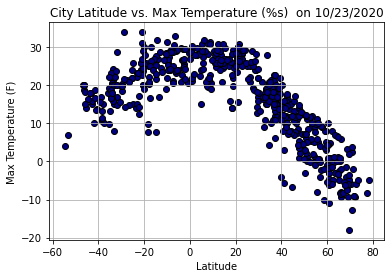

In [16]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp to Date"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (%s)  on 10/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

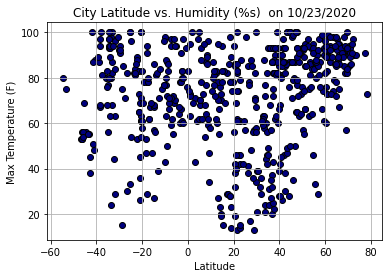

In [17]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title("City Latitude vs. Humidity (%s)  on 10/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

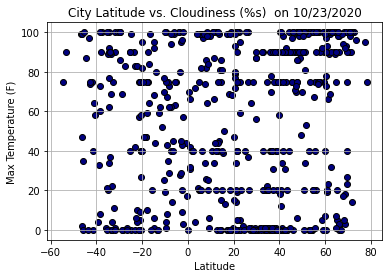

In [18]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (%s)  on 10/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

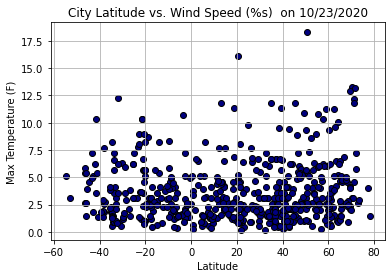

In [19]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (%s)  on 10/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/wind_speed.png")
plt.show()

## Linear Regression

In [20]:
# Northern and Southern Hemisphere DataFrames

northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >=0,:]
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0,:]

In [21]:
# Define function for creating linear regression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# funtion for annotation

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.9


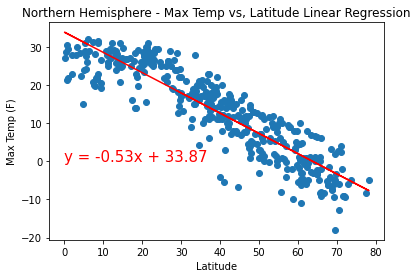

In [22]:

# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp to Date"])

# annotate function

annotate(equation, 0, 0)

#Title

plt.title("Northern Hemisphere - Max Temp vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Max Temp (F)")

# save fig 

plt.savefig("output_data/Images/NorthHem_MaxTempVsLatLinearRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.65


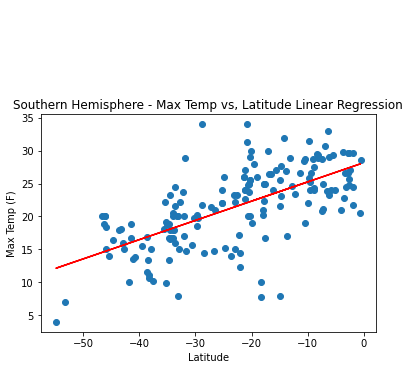

In [23]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Max Temp to Date"])

# annotate function

annotate(equation, -30, 50)

#Title

plt.title("Southern Hemisphere - Max Temp vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Max Temp (F)")

# save fig 

plt.savefig("output_data/Images/SouthHem_MaxTempVsLatLinearRegression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.34


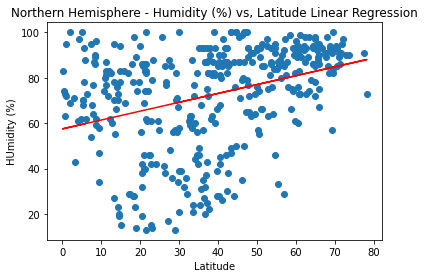

In [24]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

# annotate function

annotate(equation, 0, 0)

#Title

plt.title("Northern Hemisphere - Humidity (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("HUmidity (%)")

# save fig 

plt.savefig("output_data/Images/NorthHem_HumidityVsLatLinearRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.03


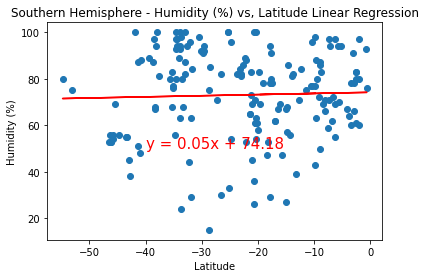

In [25]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

# annotate function

annotate(equation, -40, 50)

#Title

plt.title("Southern Hemisphere - Humidity (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Humidity (%)")

# save fig 

plt.savefig("output_data/Images/SouthHem_HumidityVsLatLinearRegression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.22


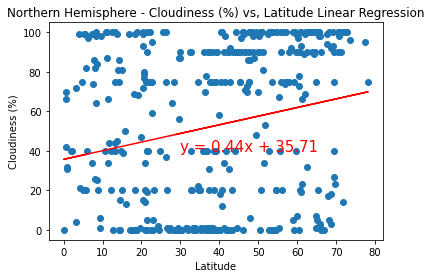

In [26]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

# annotate function

annotate(equation, 30, 40)

#Title

plt.title("Northern Hemisphere - Cloudiness (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Cloudiness (%)")

# save fig 

plt.savefig("output_data/Images/NorthHem_CloudinessVsLatLinearRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


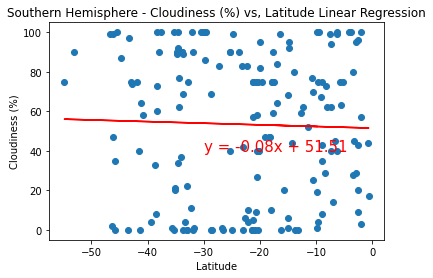

In [27]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

# annotate function

annotate(equation, -30, 40)

#Title

plt.title("Southern Hemisphere - Cloudiness (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Cloudiness (%)")

# save fig 

plt.savefig("output_data/Images/SouthHem_CloudinessVsLatLinearRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.18


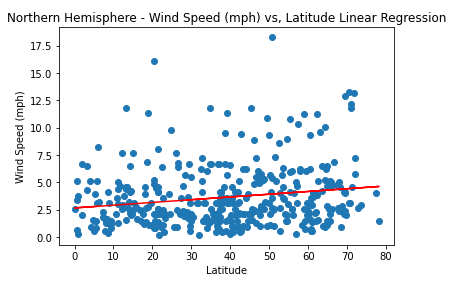

In [28]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

# annotate function

annotate(equation, 40, 20)

#Title

plt.title("Northern Hemisphere - Wind Speed (mph) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Wind Speed (mph)")

# save fig 

plt.savefig("output_data/Images/NorthHem_WindSpeedVsLatLinearRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.1


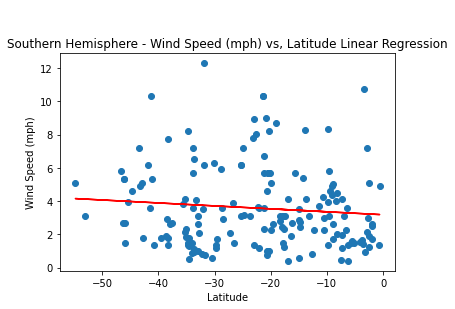

In [29]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

# annotate function

annotate(equation, -30, 15)

#Title

plt.title("Southern Hemisphere - Wind Speed (mph) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Wind Speed (mph)")

# save fig 

plt.savefig("output_data/Images/SouthHem_WindSpeedVsLatLinearRegression.png")

In [38]:
print ("Comment:")

print(f"             ")

print(f"Since the r-squared is closer to zero or negative in some cases, the Humidity, Cloudiness and Wind Speed cannot be explianed by City Latitudes in both Hemispheres.")
print(f"There seems to a strong corrleation of temperatures and latitudes in both hemispheres.")
print(f"The r squared for Souther Hemisphere shows that Temperature increase with increase in Latitude.")
      

Comment:
             
Since the r-squared is closer to zero or negative in some cases, the Humidity, Cloudiness and Wind Speed cannot be explianed by City Latitudes in both Hemispheres.
There seems to a strong corrleation of temperatures and latitudes in both hemispheres.
The r squared for Souther Hemisphere shows that Temperature increase with increase in Latitude.
